# Imports

In [20]:
import csv
import pandas as pd
import numpy as np
import keras
import tensorflow
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 100)

In [3]:
# initializing the titles and rows list 
fields = [] 
rows = [] 

# reading csv file 
with open('data.csv', 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 

    # extracting field names through first row 
    fields = next(csvreader) 

    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 

    # get total number of rows 
    print("Total no. of rows: %d"%(csvreader.line_num)) 

Total no. of rows: 6820


# Data Inspection

In [21]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6819 rows and 96 columns


In [18]:
# create dataframe from csv
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.09374

In [19]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,

In [15]:
df.dtypes

Bankrupt?                                                                int64
 ROA(C) before interest and depreciation before interest               float64
 ROA(A) before interest and % after tax                                float64
 ROA(B) before interest and depreciation after tax                     float64
 operating gross margin                                                float64
                                                                        ...   
liability to equity                                                    float64
Degree of financial leverage (DFL)                                     float64
Interest coverage ratio( Interest expense to EBIT )                    float64
one if net income was negative for the last two year zero otherwise      int64
equity to liability                                                    float64
Length: 96, dtype: object

# Visualizations

## Functions

In [27]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Bankruptcy Predictions Features', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## Visuals

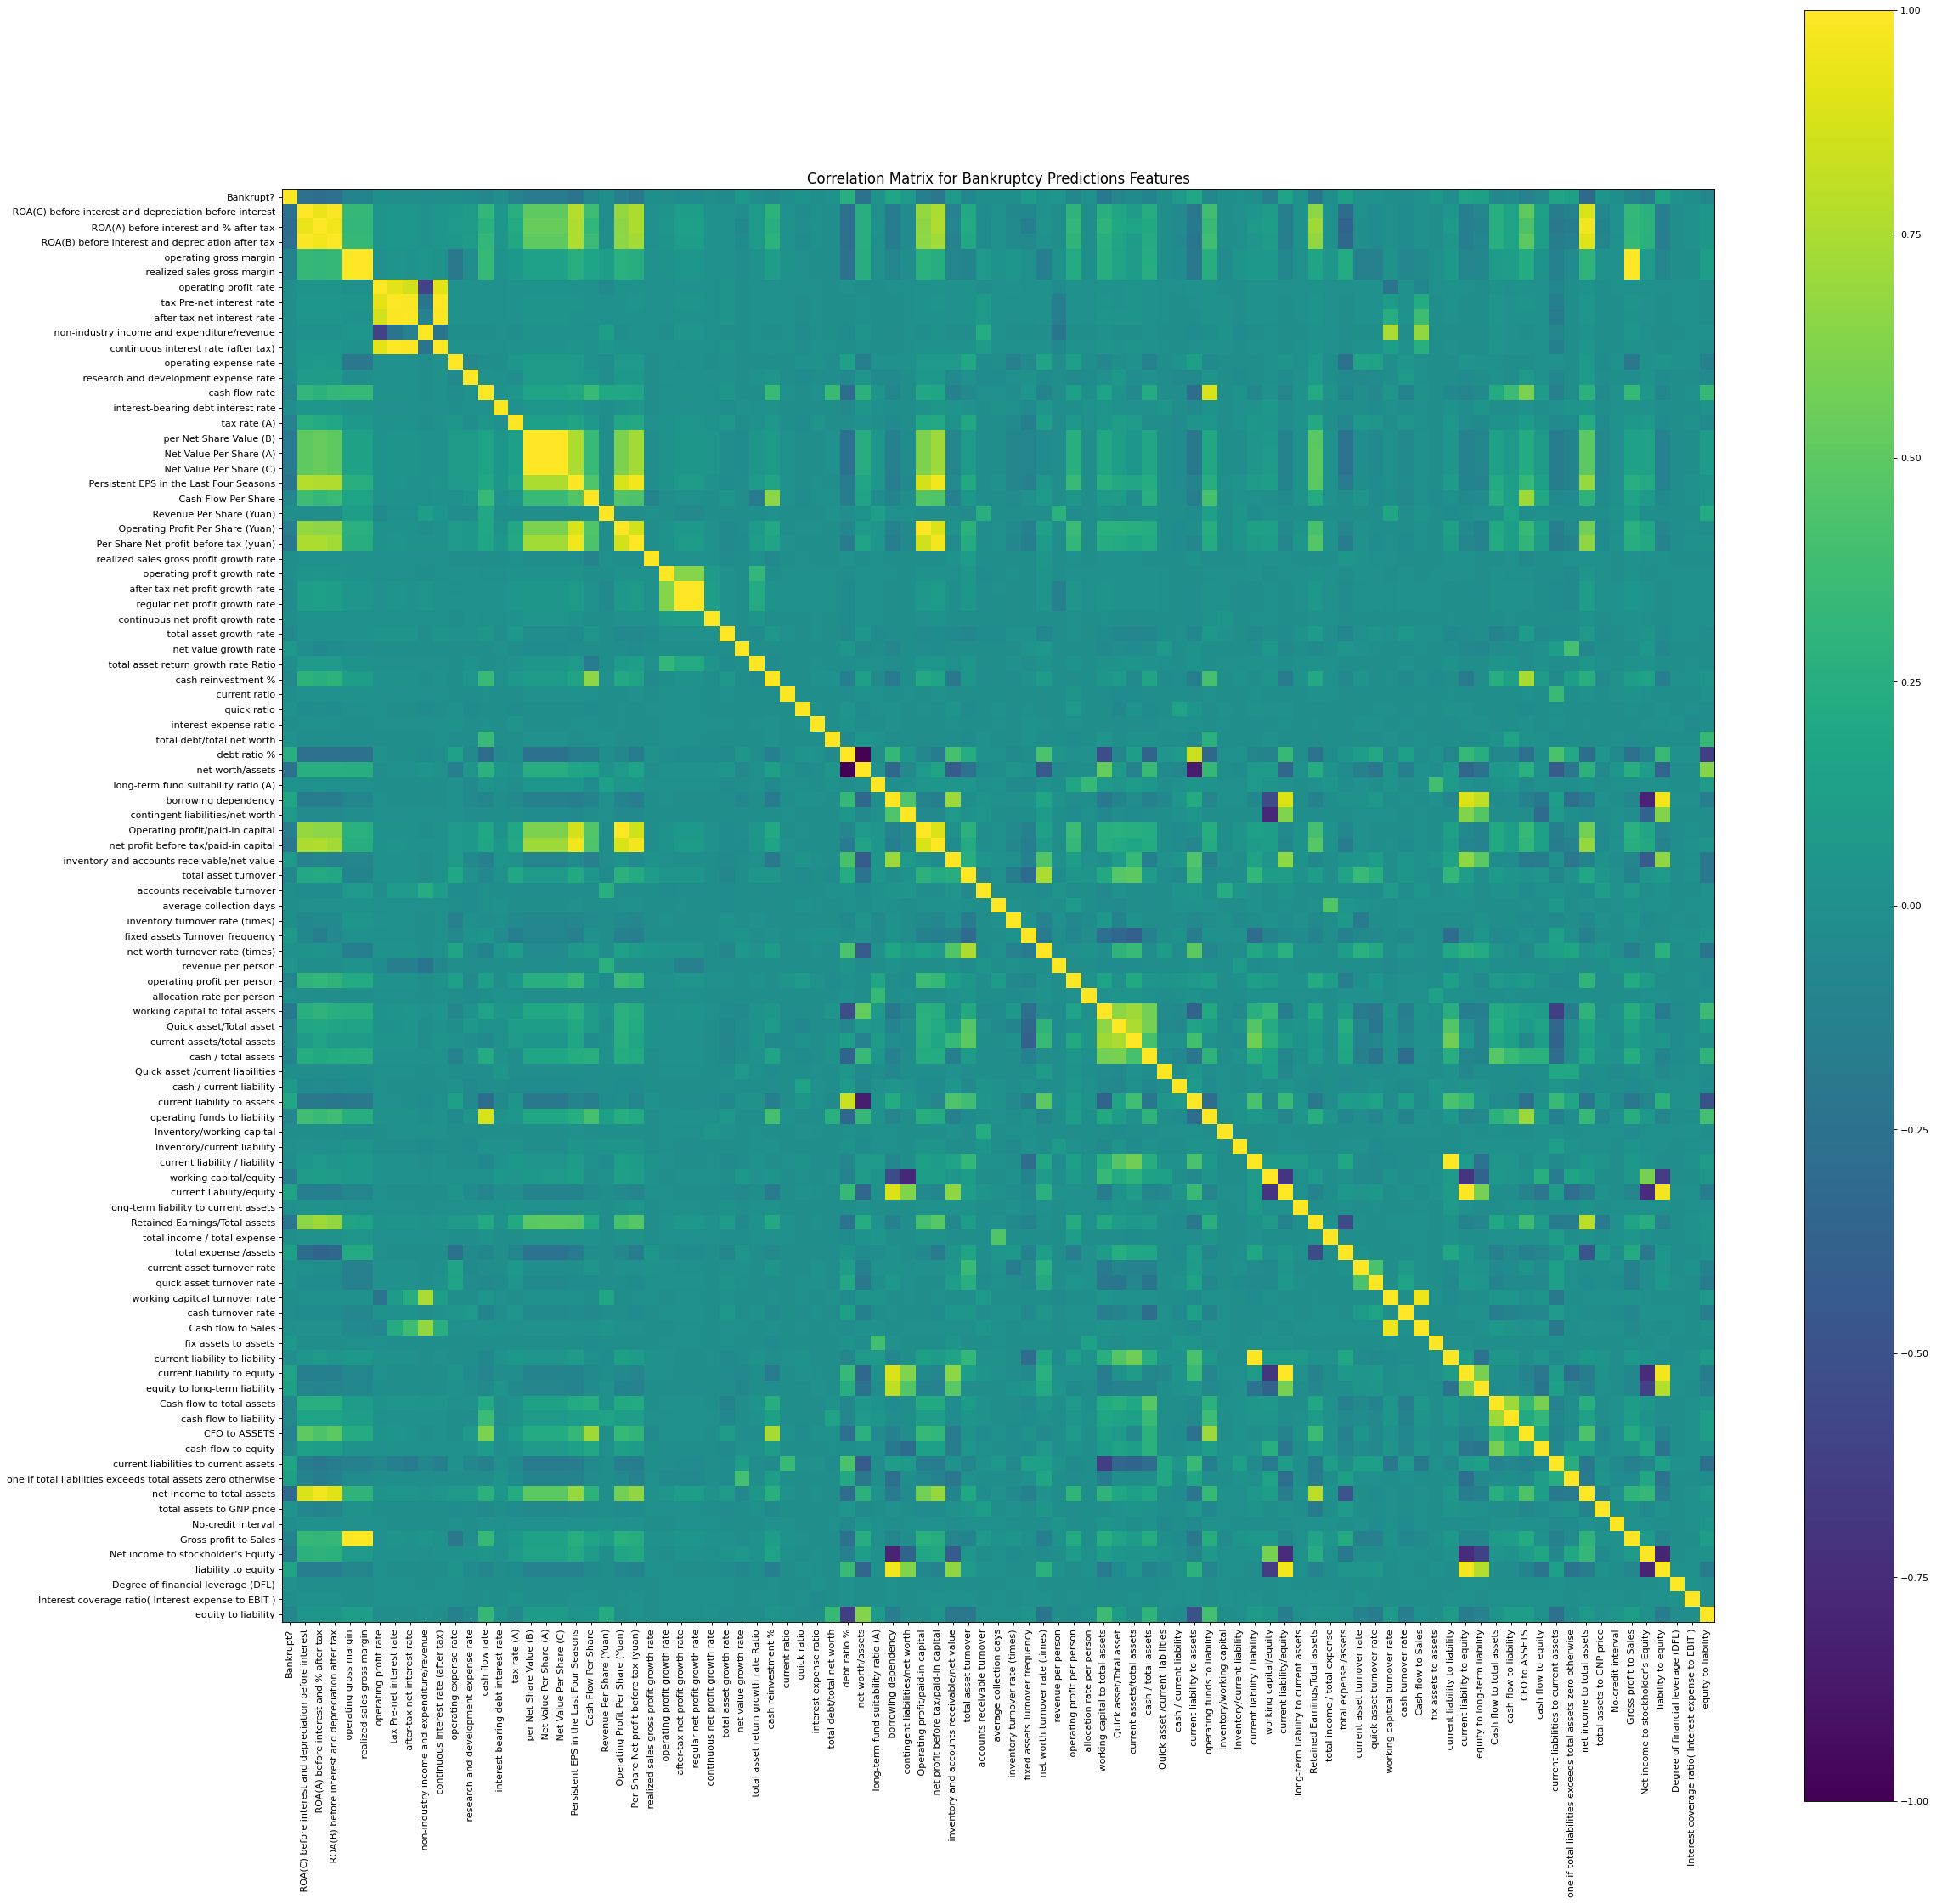

In [29]:
plotCorrelationMatrix(df, 34)

In [ ]:
plotScatterMatrix(df, 30, 20)